In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

identity_ds = pd.read_csv("/content/train_identity.csv")
transaction_ds = pd.read_csv("/content/train_transaction.csv")
merge = pd.merge(identity_ds, transaction_ds, how = "inner", on = "TransactionID")

identity_ds.shape
merge.shape

(17691, 434)

In [40]:
identity_ds.columns
identity_ds[:5]
merge[:5]

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<BarContainer object of 2 artists>

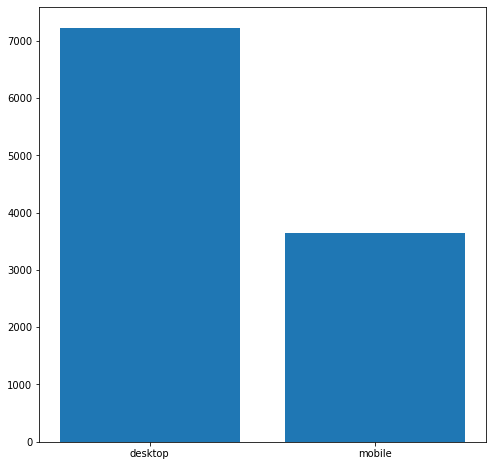

In [10]:
device_type = identity_ds.DeviceType.unique()
#make barplot 
plt.figure(figsize = (8,8))
bar = identity_ds.DeviceType.value_counts(sort=True)
bar.head()
bar_index = bar.index.tolist()
plt.bar(x = bar_index, height = bar.head())

#plt.bar(x = identity_ds.DeviceType, height = bar)
  #replace nan with 'unknown'
#identity_ds.DeviceType.replace(np.nan, 'unknown')
  #barplot with mobile vs desktop


([<matplotlib.patches.Wedge at 0x7f60b97ef850>,
 [Text(-0.5438419342249547, 0.9561568650480213, 'desktop'),
  Text(0.5438419342249542, -0.9561568650480217, 'mobile')],
 [Text(-0.2966410550317935, 0.5215401082080116, '66.5%'),
  Text(0.29664105503179317, -0.5215401082080118, '33.5%')])

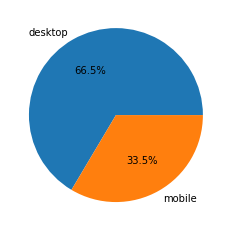

In [12]:
fig, ax = plt.subplots()
sizes = bar
labels = bar_index
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
#pie chart with same content




array([[<AxesSubplot:xlabel='TransactionID', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_01', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_02', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_03', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_04', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_05', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_06', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_07', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_08', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_09', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_10', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_11', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_13', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_14', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_17', ylabel='TransactionID'>,
        <AxesSubplot:xlabel='id_18', ylabel='TransactionID'>,


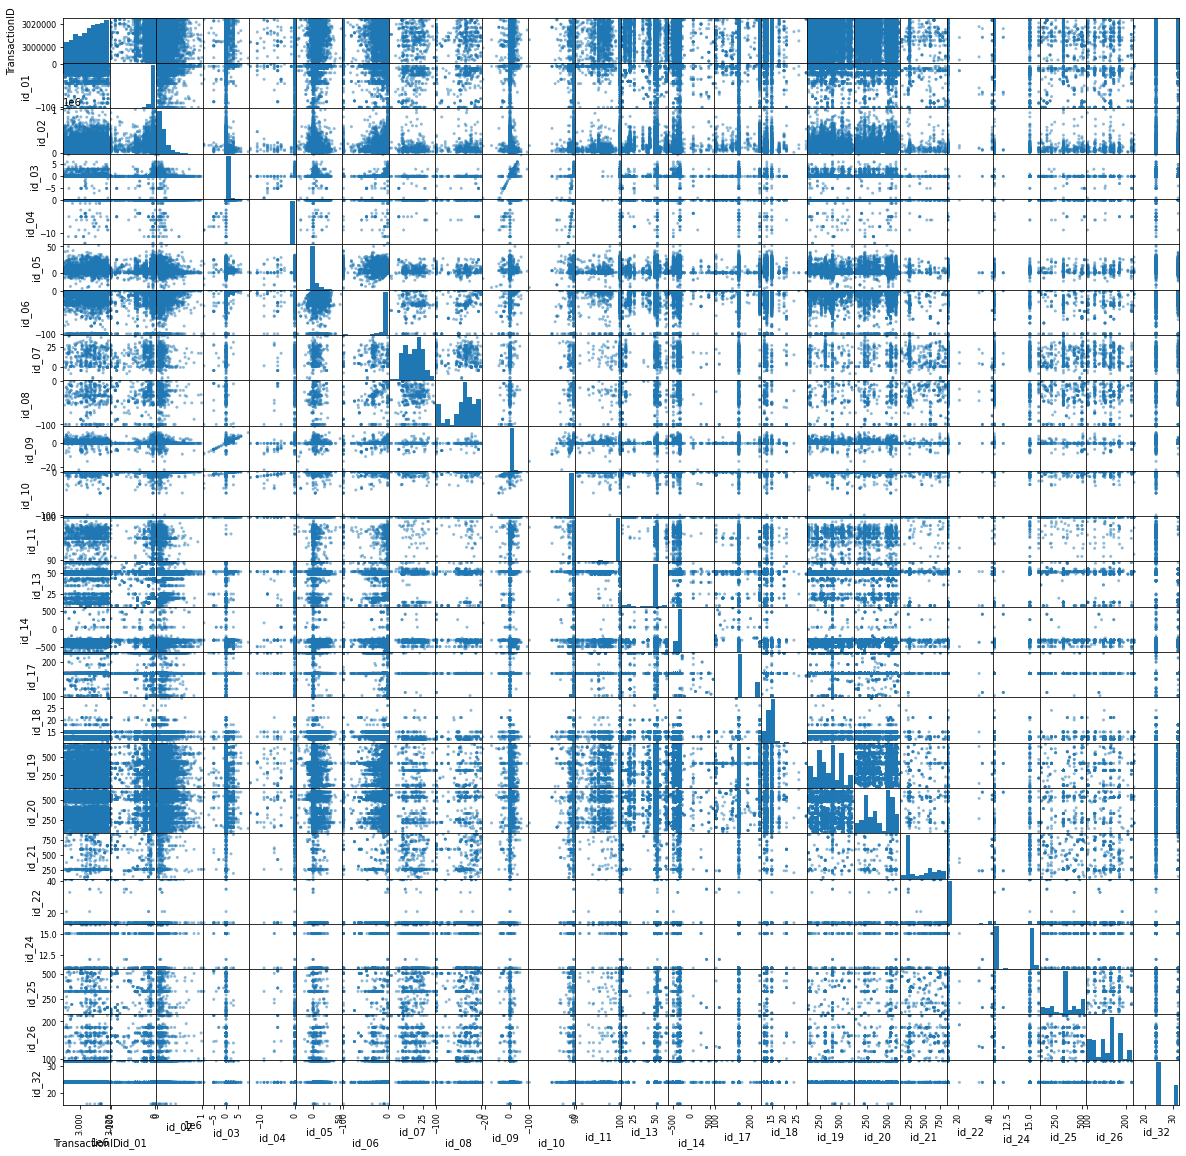

In [15]:
#correlation matrix between all 
pd.plotting.scatter_matrix(identity_ds, figsize = (20, 20
                                                ))

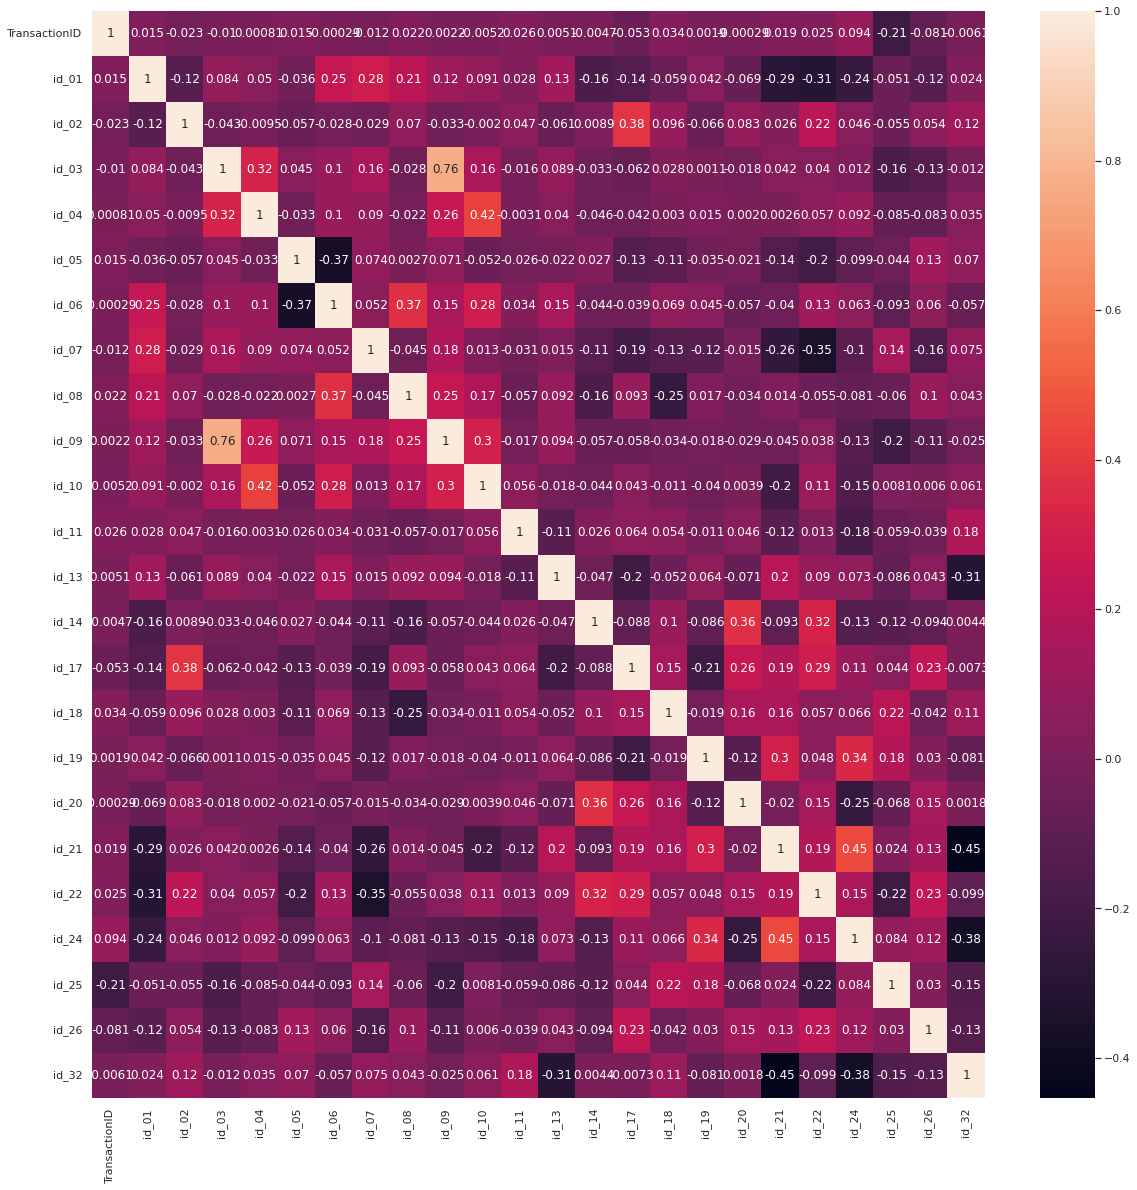

In [22]:
corr_matrix = pd.DataFrame.corr(identity_ds)
import seaborn as sn
sn.set(rc={'figure.figsize':(20,20)})
sn.heatmap(corr_matrix, annot=True)

plt.show()

In [47]:
#split merged dataset into numerical and categorical columns
num = merge.select_dtypes(include=[np.number])
num.shape
num.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
cat = merge.select_dtypes(include=['object'])
cat.head()
#cat.shape
cat.columns


Index(['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6',
       'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6',
       'M7', 'M8', 'M9'],
      dtype='object')

In [63]:
#draw a correlation matrix of all columns vs isFraud
#takes too much time
#def scatterWithIsFraud(col):
    #ax1 = merge.plot.scatter(x=col,  y='isFraud', c='DarkBlue')

#num.columns.map(scatterWithIsFraud)

In [65]:
merge.columns


Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=434)

In [88]:
merge[[col for col in merge.columns if col.startswith('D')]].head(10)
#D2-D15 looks uninterpretable
 

,DeviceType,DeviceInfo,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,mobile,SAMSUNG SM-G892A Build/NRD90M,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mobile,iOS Device,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,desktop,Windows,1.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
3,desktop,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
4,desktop,MacOS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,desktop,Windows,0.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,mobile,NaN,542.0,542.0,NaN,NaN,NaN,537.0,4.0,29.0,0.0,520.0,NaN,NaN,NaN,NaN,541.0
8,desktop,Windows,0.0,NaN,NaN,0.0,0.0,0.0,0.0,83.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
9,desktop,Windows,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0


In [85]:
merge.head()
#choose features from merged dataset
#run nn out of selected features


#drop vesta features

merge_summary = merge[[col for col in merge.columns if not (col.startswith('V') or col.startswith('id'))]].head(12)
merge_num = merge_summary.select_dtypes(include=[np.number])
merge_cat = merge_summary.select_dtypes(include=object)

merge_num.head(), merge_cat.head()

(   TransactionID  isFraud  TransactionDT  TransactionAmt  card1  card2  card3  \
 0        2987004        0          86506          50.000   4497  514.0  150.0   
 1        2987008        0          86535          15.000   2803  100.0  150.0   
 2        2987010        0          86549          75.887  16496  352.0  117.0   
 3        2987011        0          86555          16.495   4461  375.0  185.0   
 4        2987016        0          86620          30.000   1790  555.0  150.0   
 
    card5  addr1  addr2  ...   D6   D7    D8   D9  D10  D11  D12  D13  D14  D15  
 0  102.0  420.0   87.0  ...  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
 1  226.0  337.0   87.0  ...  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
 2  134.0    NaN    NaN  ...  0.0  0.0  83.0  0.0  0.0  NaN  0.0  0.0  0.0  0.0  
 3  224.0    NaN    NaN  ...  0.0  NaN   NaN  NaN  0.0  NaN  0.0  0.0  0.0  0.0  
 4  226.0  170.0   87.0  ...  NaN  NaN  26.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  
 
 [5 rows x 4

In [80]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from datetime import datetime

In [ ]:
target = 'isFraud'
# Categorical features
cat = merge_cat
num = num